# Corona Virus Model

## Data Gathering

In [1]:
import numpy as np
import math
popDensityFile = open("PopDensityLoc.csv", 'r')
lines = popDensityFile.readlines()
L = []
for line in lines: 
    L.append(line.split('\n')[0].split(','))
pdArray = np.c_[np.array(L)[1:, 8:12].astype(float), np.array(L)[1:, -1].astype(float)]

N = 1000
M = 680

pGrid = np.zeros((M, N)).astype(float)
iGrid = np.zeros((M, N)).astype(float)
fixGrid = np.zeros((M, N)).astype(float)
radius = 0.5
searchDist = 20


def gauss(x,y, mux, muy, sigma):
    return math.exp(-((x-mux)**2 + (y - muy)**2)/sigma)

In [2]:
countyN = 0
iters = 0
for l in pdArray:
    if iters % 50 == 0:
        print(iters / len(pdArray))
    xnear = int((l[3] + 131.0) * (N / 66.0))
    ynear = int((l[2] - 21.0) * (M / 34.0))
    cAbove = max(xnear - searchDist, 0)
    cBelow = min(xnear + searchDist, N)
    rAbove = max(ynear - searchDist, 0)
    rBelow = min(ynear + searchDist, M)
    for r in range(rAbove, rBelow):
        for c in range(cAbove, cBelow):
            x = -131.0 + 66.0 * c / N
            y = 21.0 + 34.0 * r / M
            g1 = gauss(x, y, l[3], l[2], radius * np.sqrt(l[0]) / 69.3)
            g = l[1] * g1
            if g > 2.5:
                iGrid[r,c] += l[-1]
            pGrid[r,c] += g
    iters += 1
    countyN += 1

for r in range(M):
    for c in range(N):
        if pGrid[r,c] > 3:
            fixGrid[r, c] = 1
        

0.0
0.01591849729385546
0.03183699458771092
0.04775549188156638
0.06367398917542184
0.0795924864692773
0.09551098376313276
0.11142948105698822
0.1273479783508437
0.14326647564469913
0.1591849729385546
0.17510347023241005
0.19102196752626552
0.206940464820121
0.22285896211397643
0.2387774594078319
0.2546959567016874
0.27061445399554285
0.28653295128939826
0.30245144858325373
0.3183699458771092
0.3342884431709647
0.3502069404648201
0.36612543775867556
0.38204393505253104
0.3979624323463865
0.413880929640242
0.4297994269340974
0.44571792422795287
0.46163642152180834
0.4775549188156638
0.4934734161095193
0.5093919134033748
0.5253104106972302
0.5412289079910857
0.5571474052849411
0.5730659025787965
0.588984399872652
0.6049028971665075
0.620821394460363
0.6367398917542184
0.6526583890480738
0.6685768863419294
0.6844953836357848
0.7004138809296402
0.7163323782234957
0.7322508755173511
0.7481693728112067
0.7640878701050621
0.7800063673989175
0.795924864692773
0.8118433619866284
0.8277618592804

In [3]:
import matplotlib.pyplot as plt
X = []
Y = []
C = []

IX = []
IY = []
IC = []

for r in range(M):
     for c in range(N):
        x = -131.0 + 66.0 * c / N
        y = 21.0 + 34.0 * r / M
        X.append(x)
        Y.append(y)
        C.append(np.sqrt(pGrid[r, c]))
        IX.append(x)
        IY.append(y)
        IC.append(np.sqrt(pGrid[r, c] * iGrid[r,c]))

X = np.array(X)
Y = np.array(Y)
X.size


680000

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

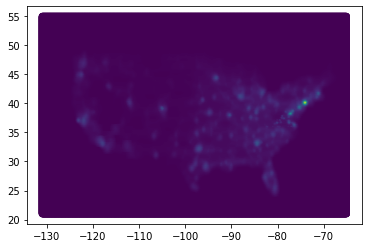

In [4]:
plt.scatter(X, Y, c=C)
plt.plot

In [5]:
zeroBoi = np.zeros((M, N)).astype(float)
def Right(a):
    return np.c_[zeroBoi[:,0], a[:,:-1]]
def Left(a):
    return np.c_[a[:,1:], zeroBoi[:,0]]
def Down(a):
    return np.r_[zeroBoi[0,:].reshape((1,N)), a[:-1,:]]
def Up(a):
    return np.r_[a[1:,:], zeroBoi[0,0:].reshape((1, N))]
    
def D(a, d):
    global fixGrid
    if d == 'x':
        return Left(fixGrid) * Right(fixGrid) * (Left(a) - Right(a)) / (2 * 66.0 / N)
    elif d == 'y':
        return Up(fixGrid) * Down(fixGrid) * (Up(a) - Down(a)) / (2 * 34.0 / M)


In [6]:
sGrid = 1-iGrid
sGridStart = sGrid.copy()
iGridStart = iGrid.copy()

In [7]:
sGrid = sGridStart
iGrid = iGridStart
print(sGrid)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.99938297 0.99938297 1.         ... 1.         1.         1.        ]
 [0.99938297 0.99938297 0.99938297 ... 1.         1.         1.        ]]


In [8]:
sGrid = sGridStart
iGrid = iGridStart


alpha = 0.414
beta = 0.0909
k1 = 0.02
k2 = 0.015
sGrid = 1 - iGrid

def plotGrids(SG, IG, PG):
    IX = []
    IY = []
    IC = []

    for r in range(M):
         for c in range(N):
            x = -131.0 + 66.0 * c / N
            y = 21.0 + 34.0 * r / M
            IX.append(x)
            IY.append(y)
            IC.append(IG[r,c] * np.sqrt(np.sqrt(pGrid[r,c])))
            #IC.append(np.sqrt(pGrid[r, c] * iGrid[r,c]))
    #plt.figure(figsize=(25,17))
    #plt.scatter(X, Y, c=C, s=8)
    plt.figure(figsize=(25,17))
    plt.scatter(IX, IY, c=IC, s=10)
    plt.clim(vmin=0, vmax=14.0 * 0.5)
    plt.plot

print(sGrid.shape)
def step():
    global sGrid
    global pGrid
    global iGrid
    divS = D(D(sGrid, 'x'), 'x') + D(D(sGrid, 'y'), 'y')* fixGrid * Left(fixGrid) * Right(fixGrid) * Up(fixGrid) * Down(fixGrid)
    divI = D(D(iGrid, 'x'), 'x') + D(D(iGrid, 'y'), 'y')* fixGrid * Left(fixGrid) * Right(fixGrid) * Up(fixGrid) * Down(fixGrid)
    sGrid += (k1 * divS / (pGrid + 2) - alpha * np.multiply(iGrid, sGrid)) * fixGrid
    iGrid += (k2 * divI / (pGrid + 2) + alpha * np.multiply(iGrid, sGrid) - beta * iGrid)  * fixGrid
    sGrid = sGrid
    pGrid = pGrid * fixGrid
    plotGrids(sGrid, iGrid, pGrid)
    

(680, 1000)


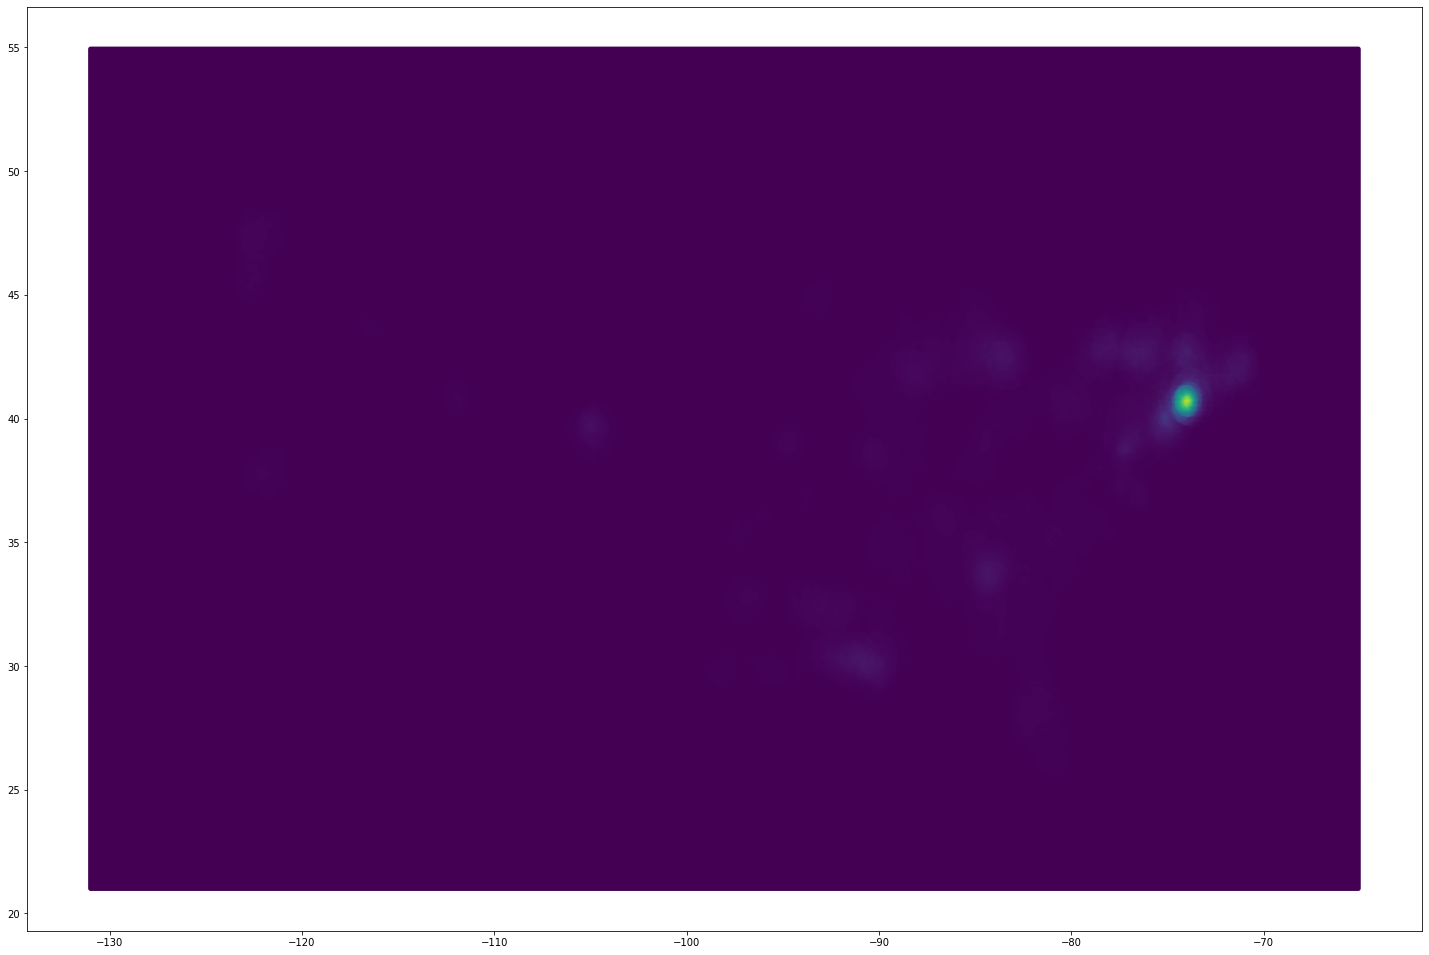

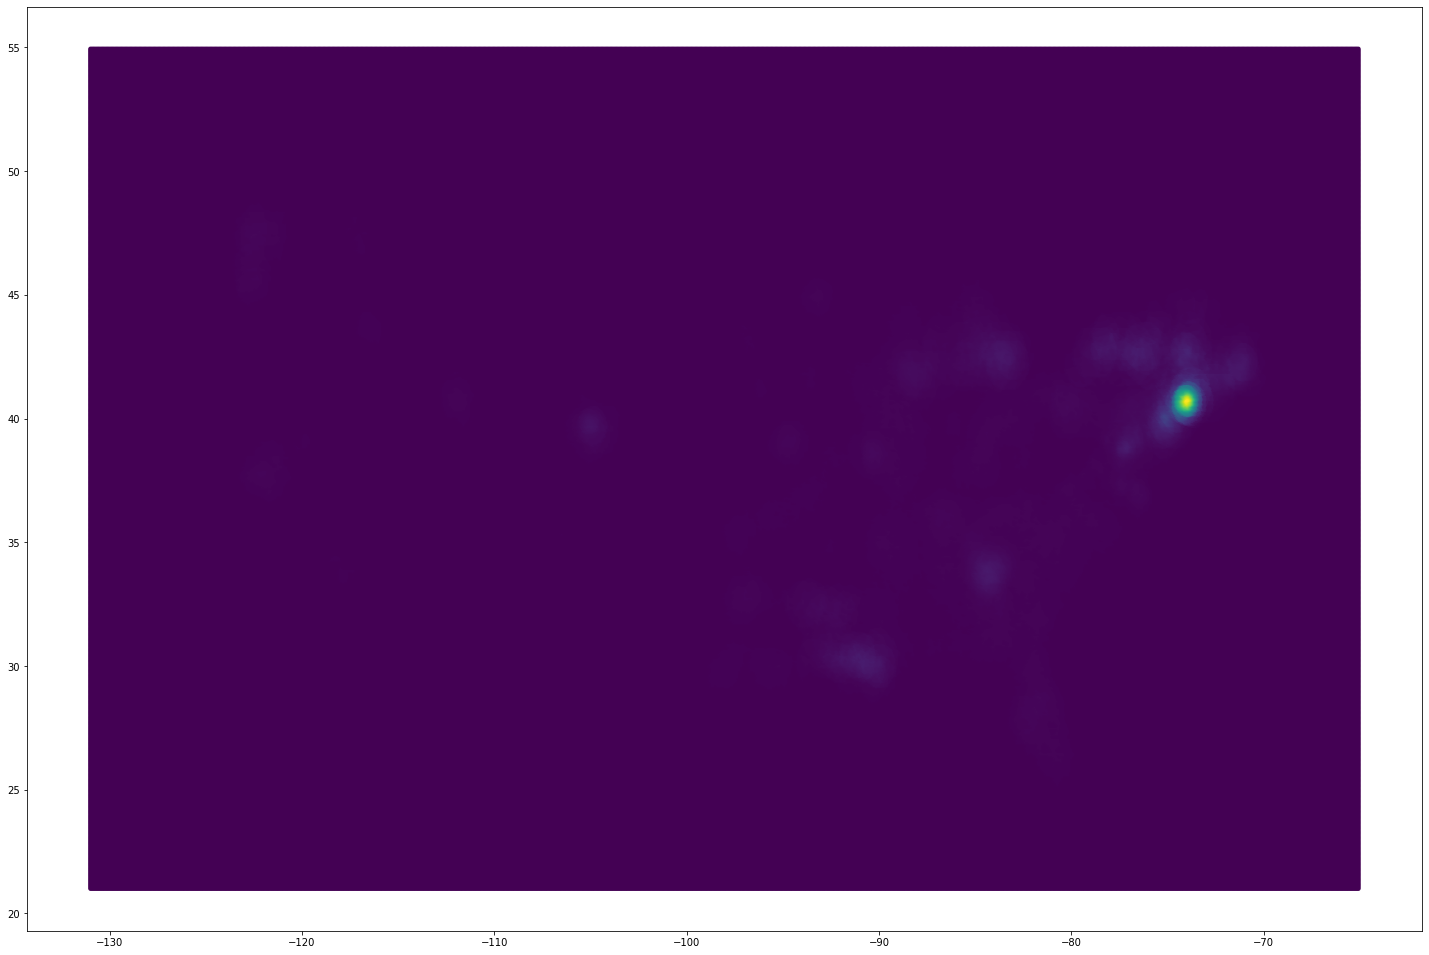

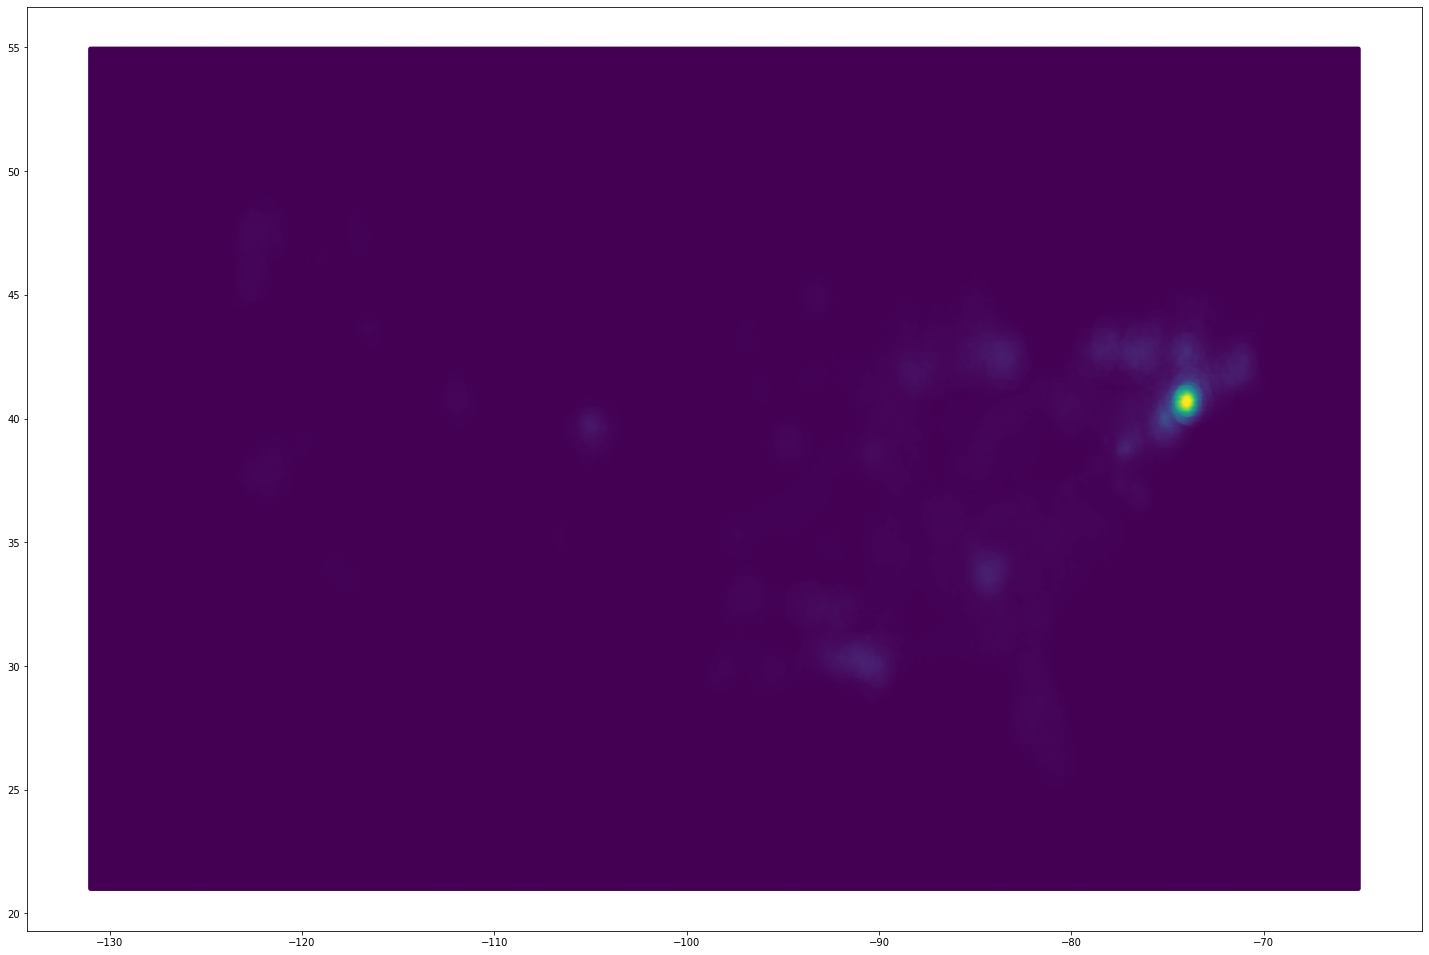

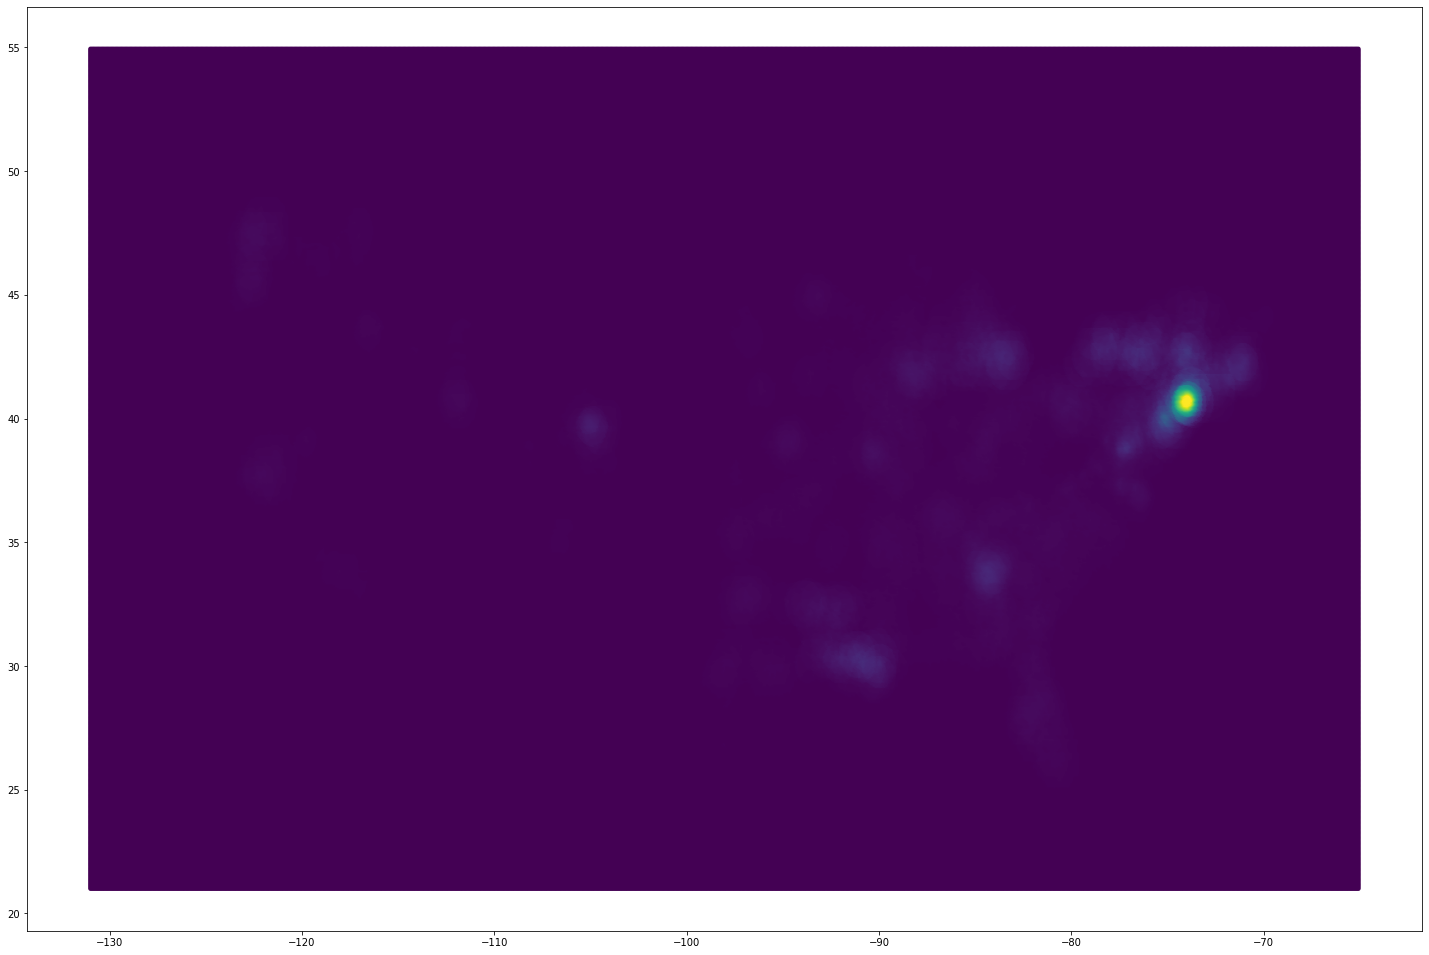

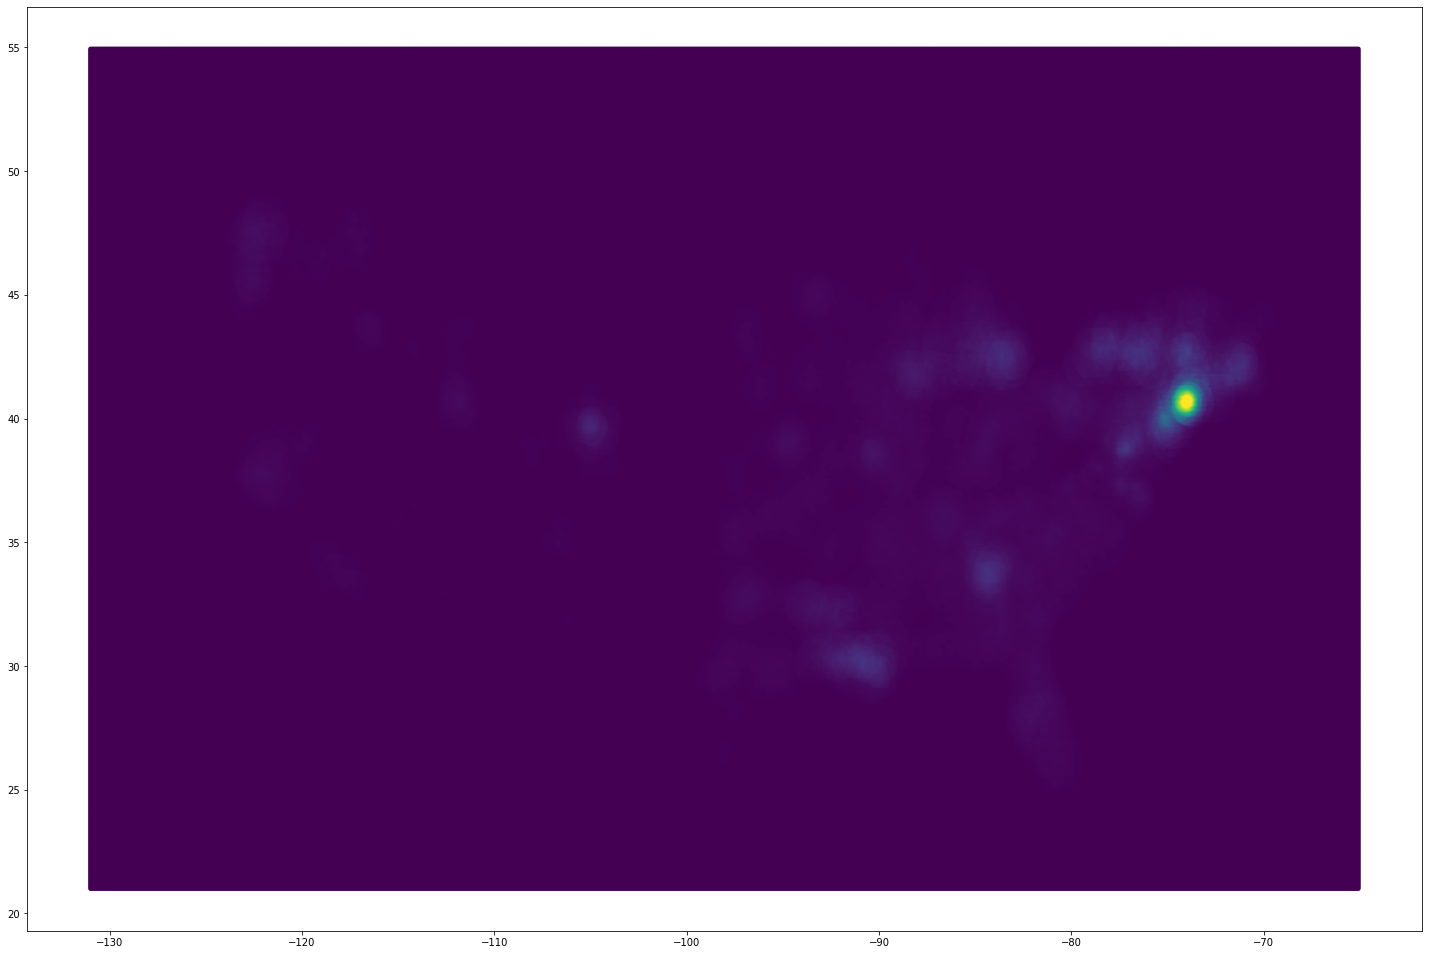

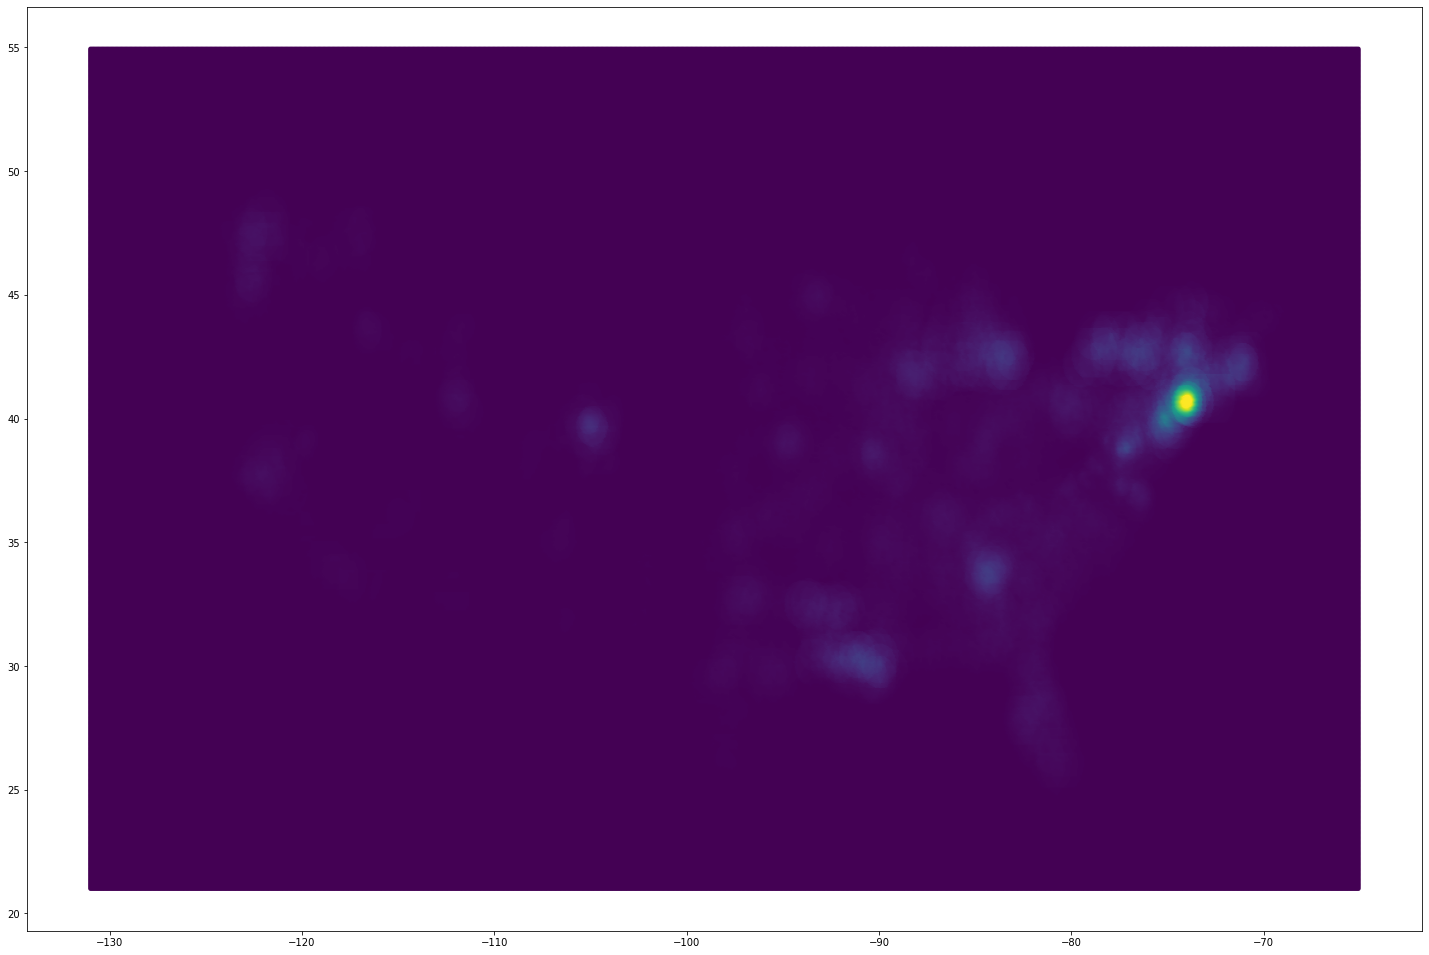

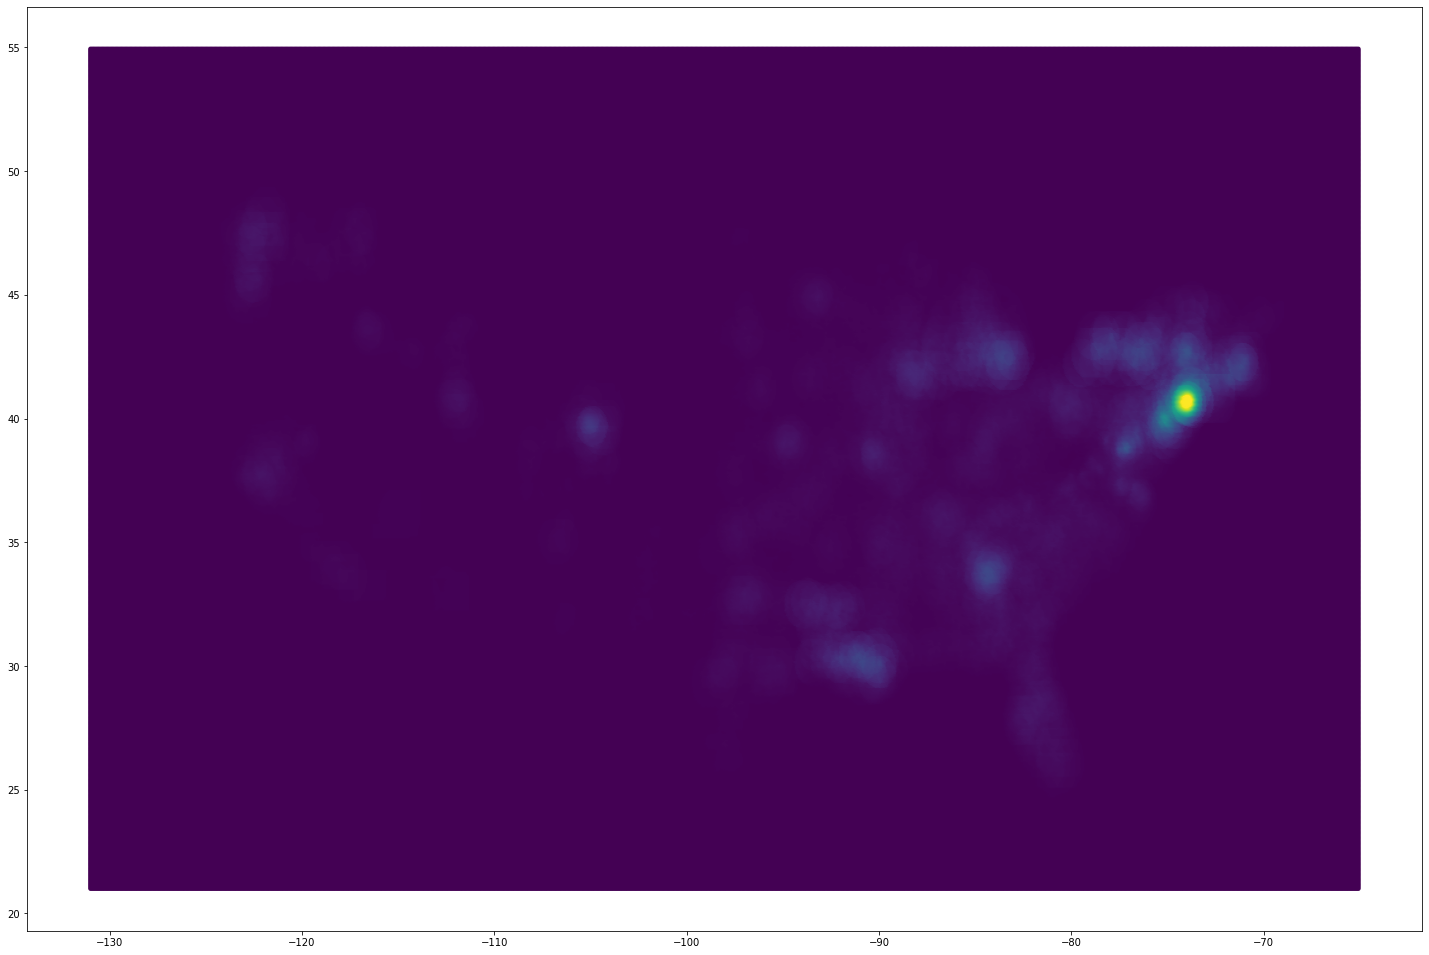

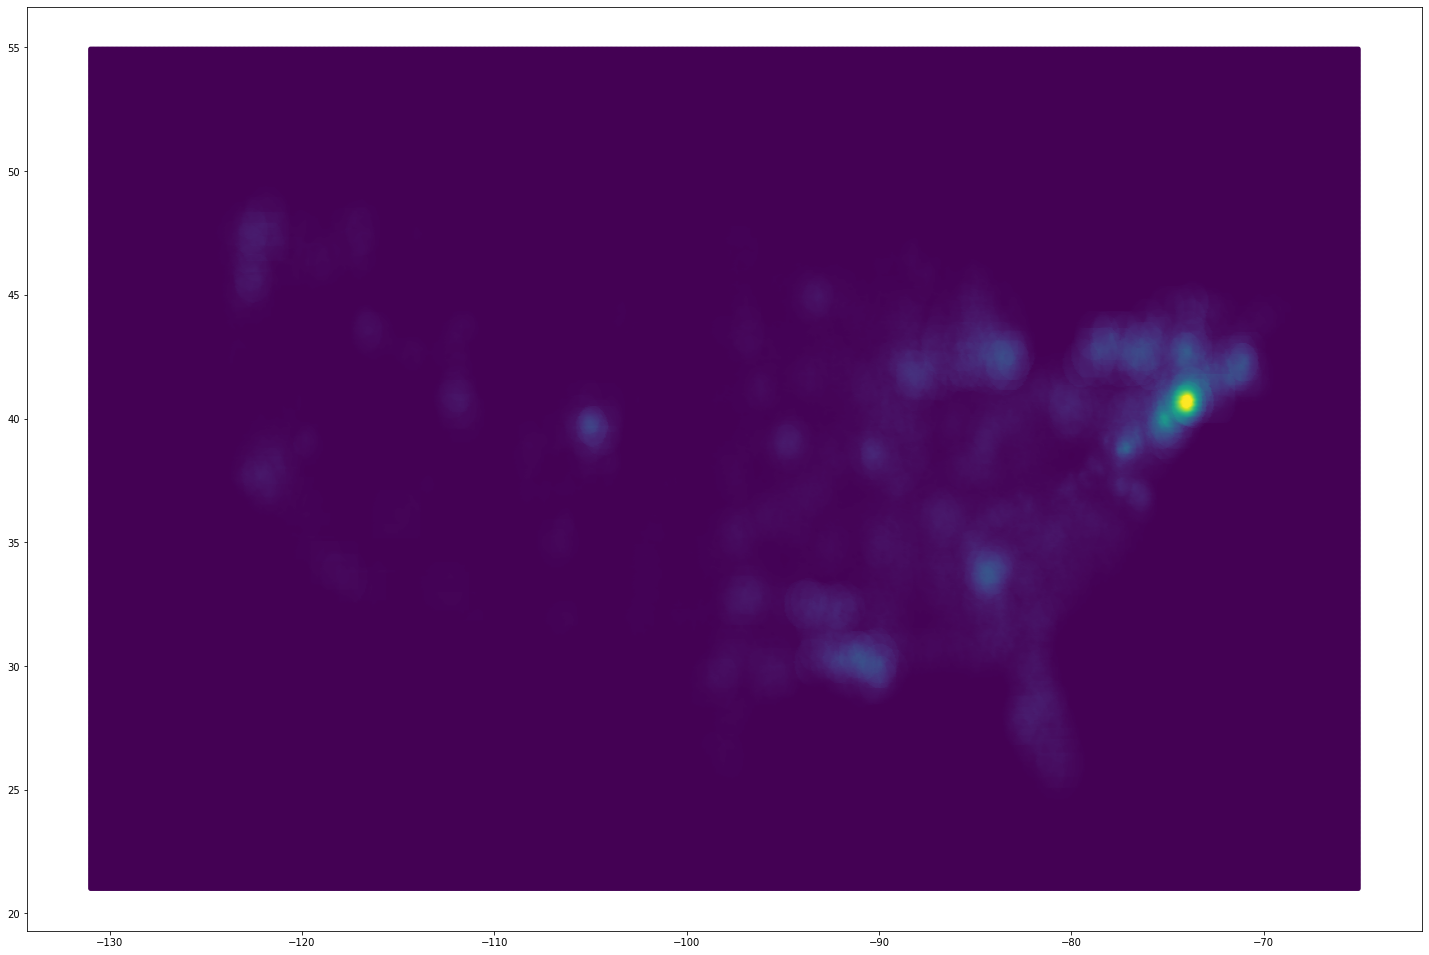

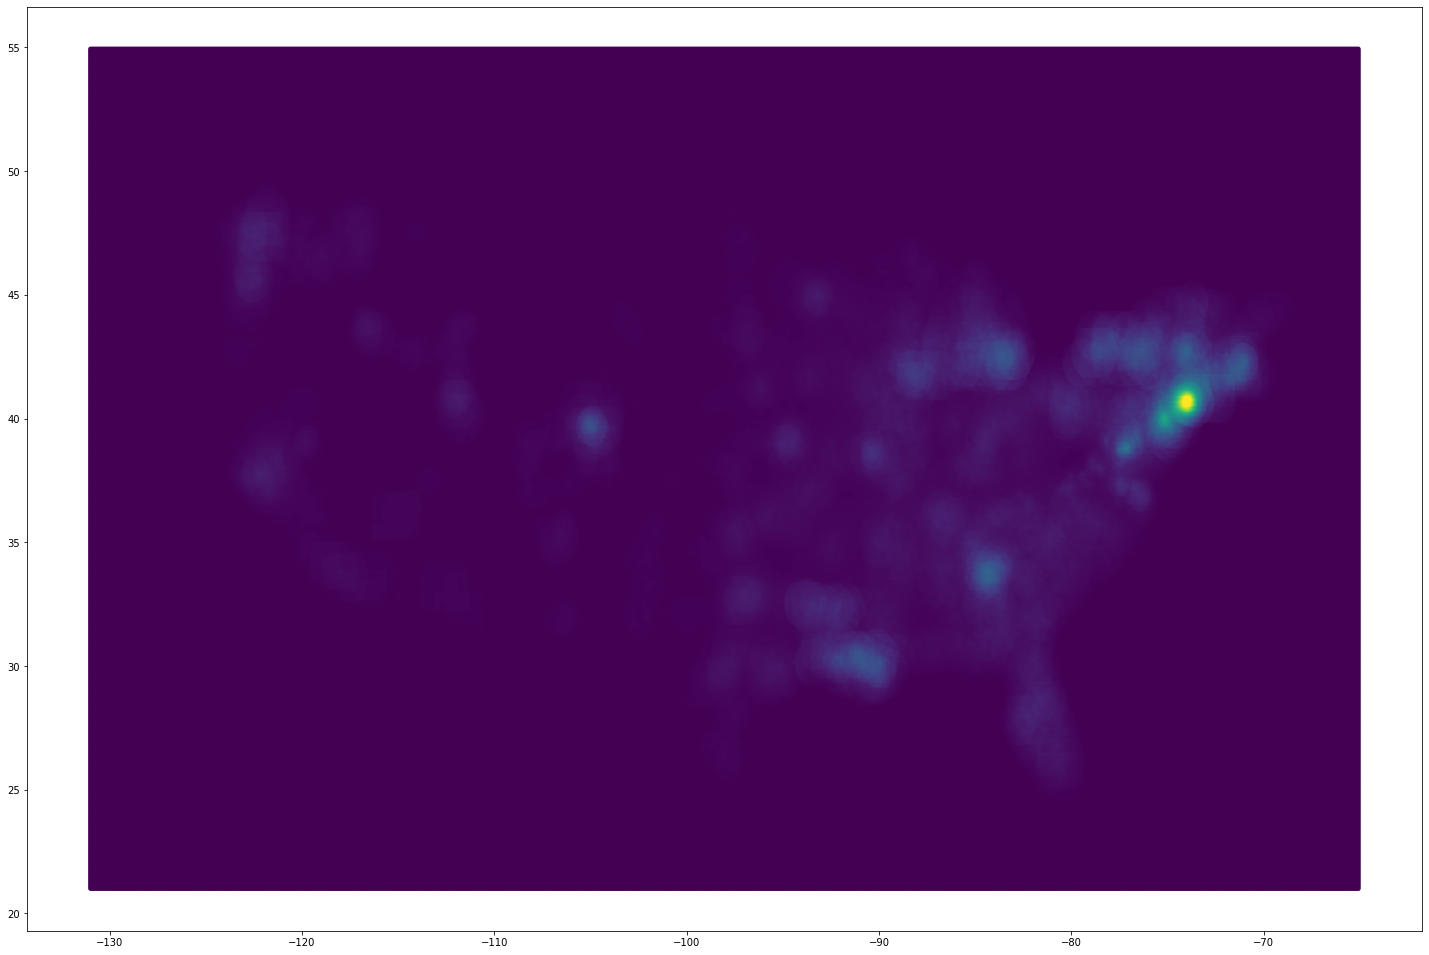

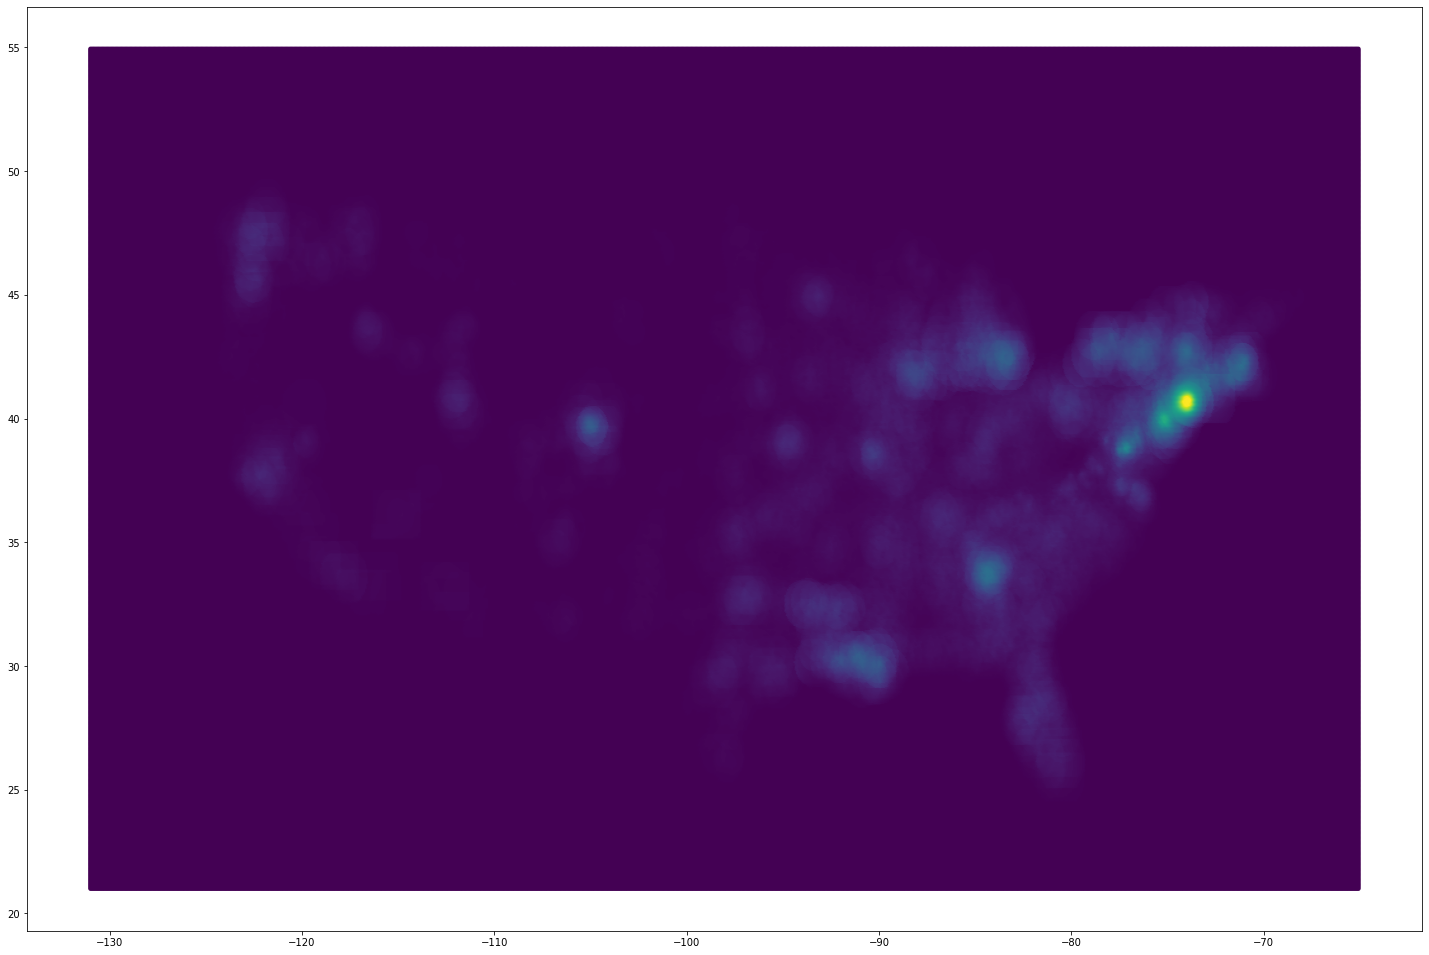

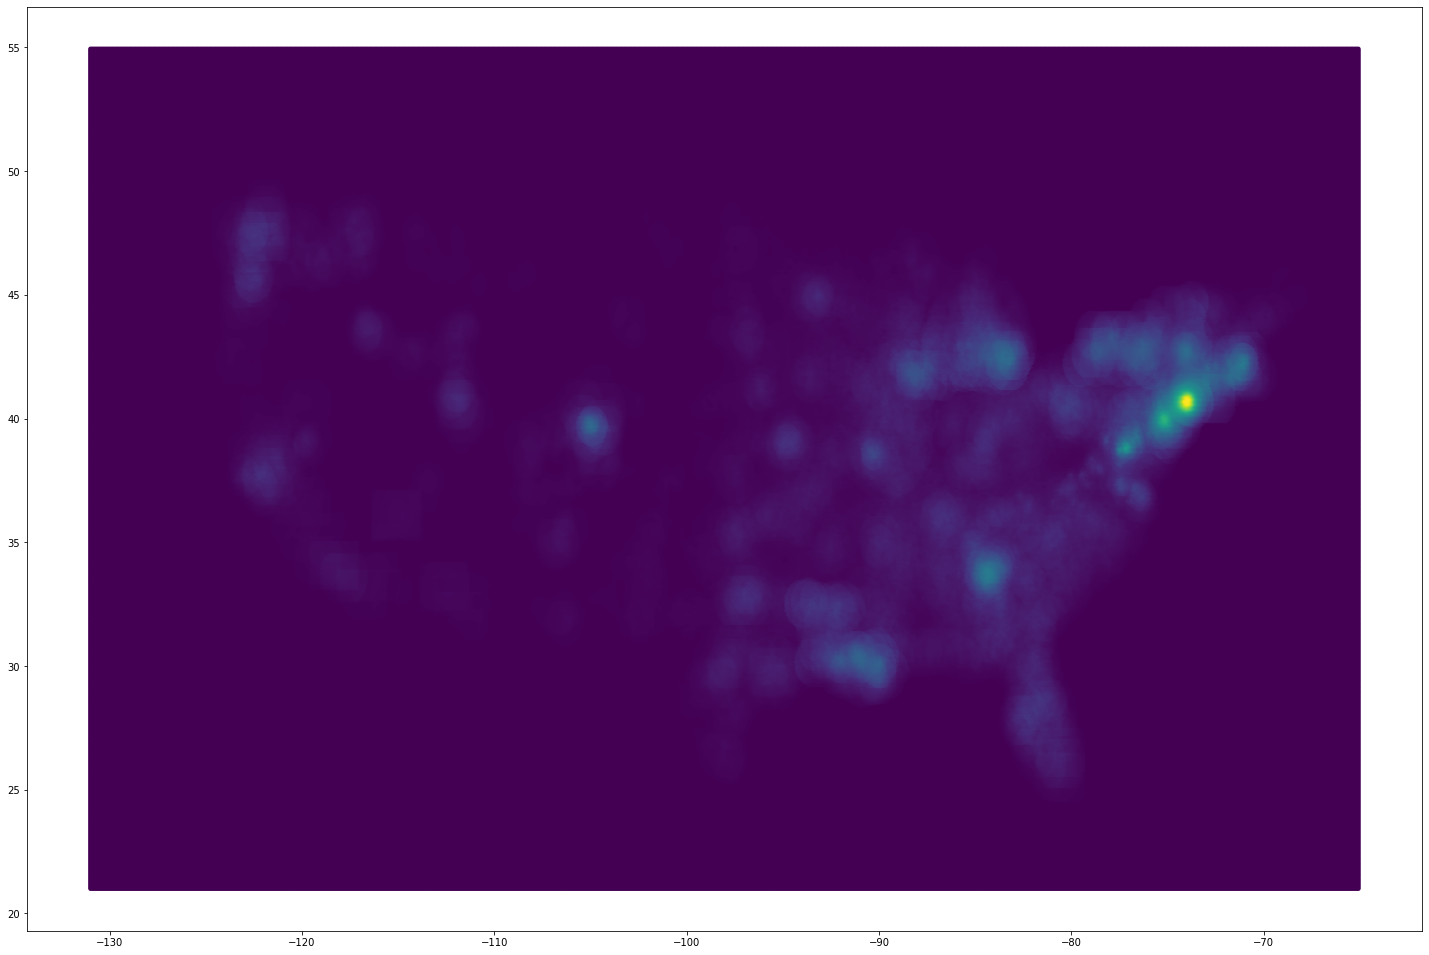

In [9]:
plotGrids(sGrid, iGrid, pGrid)
for i in range(10):
    step()